<a href="https://colab.research.google.com/github/vinhtq-2618/basic-ml-course/blob/lecture09/09_Computer_Vision/Lec09_Supplement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png -O image.png

--2022-12-12 03:08:19--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>] 462.73K  --.-KB/s    in 0.08s   

2022-12-12 03:08:20 (5.49 MB/s) - ‘image.png’ saved [473831/473831]



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

# OpenCV Introduction

## Read image with OpenCV
To read image with OpenCV, we use `cv2.imread()`.

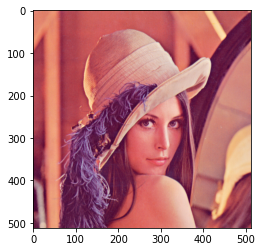

In [ ]:
img = cv2.imread("image.png")

plt.imshow(img[:,:,::-1])  # Since OpenCV loads an image as BGR, we need to reverse the channel to RGB.

By default, OpenCV reads an image as a color image `cv2.IMREAD_COLOR`. To read an image as a grayscale image, we can pass `IMREAD_GRAYSCALE` as the second argument.

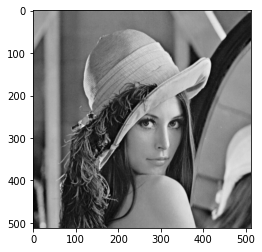

In [ ]:
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")

# Write image with OpenCV

To write an image to a file, use `cv2.imwrite`. Remember to specify the correct extension of the file. OpenCV supports writing to JPEG (`.jpg`), PNG (`.png`) as well as many other formats.

In [ ]:
cv2.imwrite("test.jpg", img)  # Save as a JPEG file
cv2.imwrite("test.png", img)  # Save as a PNG file

True

# Color space conversion

You can use `cv2.cvtColor` to convert your image from a color space to another one. Supported conversion can be found [here](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html).

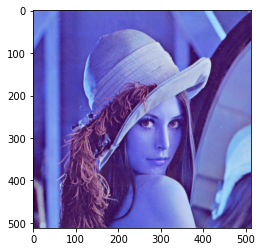

In [ ]:
img = cv2.imread('image.png')
plt.imshow(img)  # Image is in BGR color space

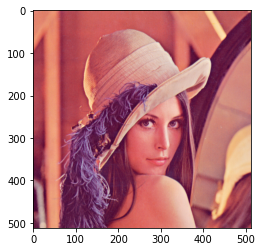

In [ ]:
# Convert BGR to RGB color space
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

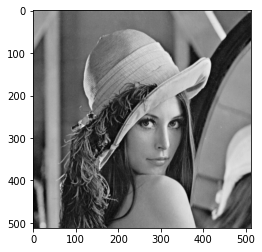

In [ ]:
# Convert RGB to Grayscale color space
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")

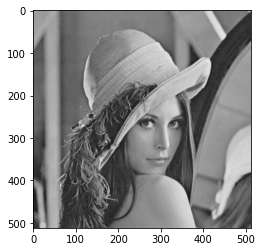

In [ ]:
# Convert Grayscale to RGB color space. Note that the result is still a grayscale image.
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

# Accessing and modifying image

Use `.shape` to get info of an image. It includes height, width and number of channels (optional).

In [ ]:
img = cv2.imread("image.png")
print(img.shape)  # Color space is BGR so there are 3 channels

(512, 512, 3)


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)  # Color space is Grayscale so OpenCV omit the number of channels

(512, 512)


Use matrix slicing to crop image

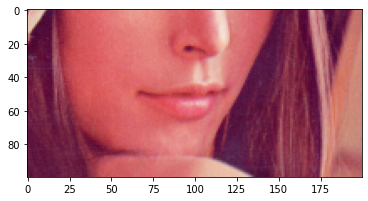

In [ ]:
img = cv2.imread("image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img[300:400, 200:400])

You can assign pixel values to the image.

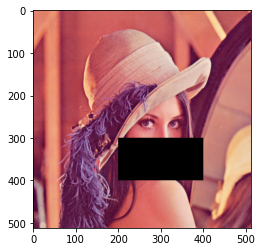

In [ ]:
img = cv2.imread("image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img[300:400, 200:400] = (0, 0, 0)  # Black color
plt.imshow(img)

# Drawing shapes with OpenCV

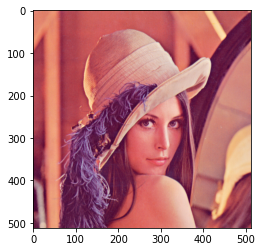

In [ ]:
img = cv2.imread("image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

OpenCV allows you to draw various shapes like line, rectangle, circle, ellipse, etc. Check [here](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html) and [here](https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html) for more.

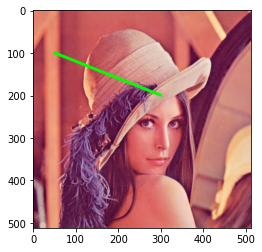

In [ ]:
vis_img = img.copy()  # Create a new copy of the image

# Draw a simple green line on the image. Coordinate format: (x, y).
cv2.line(vis_img, (50, 100), (300, 200), (0, 255, 0), 5)
plt.imshow(vis_img)

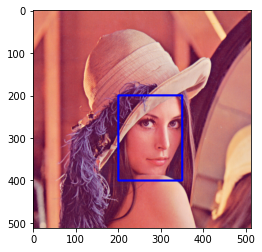

In [ ]:
vis_img = img.copy()

# Rectangle
cv2.rectangle(vis_img, (200, 200), (350, 400), (0, 0, 255), 3)
plt.imshow(vis_img)

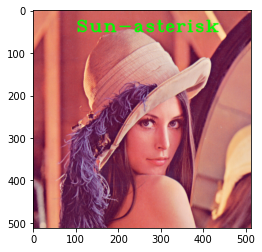

In [ ]:
vis_img = img.copy()

# Add text
cv2.putText(vis_img, "Sun-asterisk", (100, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(vis_img)

# Image smoothing

## Average blurring

Text(0.5, 1.0, 'Average blur')

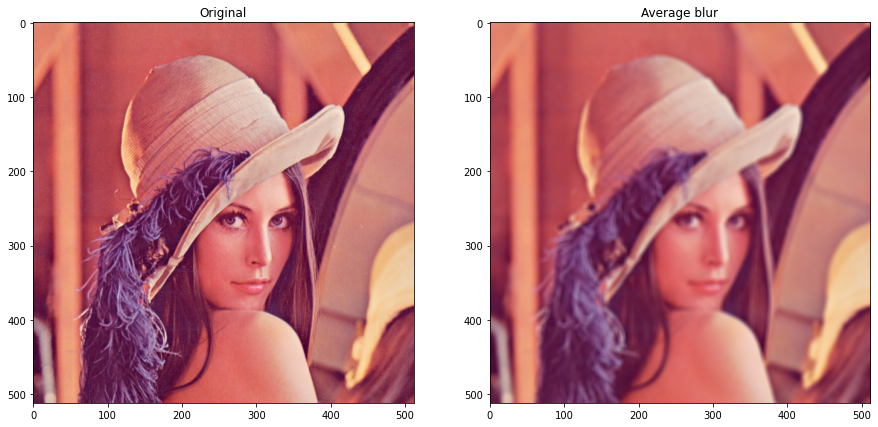

In [ ]:
blur = cv2.blur(img, (7, 7))

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(blur)
ax[1].set_title('Average blur')

## Gaussian blurring

Text(0.5, 1.0, 'Gaussian blur')

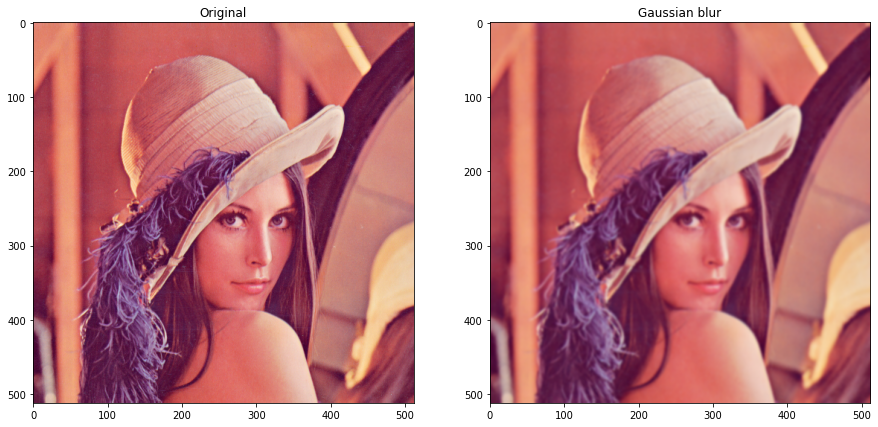

In [ ]:
blur = cv2.GaussianBlur(img, (7, 7), 0)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(blur)
ax[1].set_title('Gaussian blur')

## Median blurring

Text(0.5, 1.0, 'Median blur')

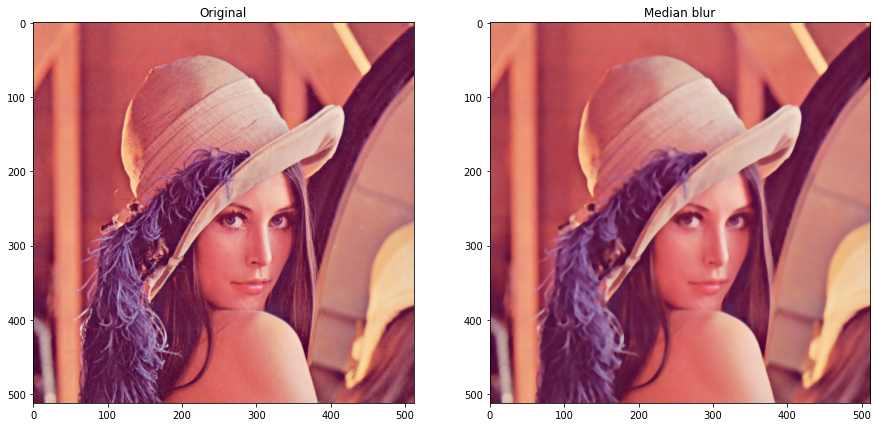

In [ ]:
blur = cv2.medianBlur(img, 5)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(blur)
ax[1].set_title('Median blur')

# Image thresholding

In [ ]:
!wget -O sudoku.jpg http://i.stack.imgur.com/u5Qev.jpg

--2022-12-12 03:08:32--  http://i.stack.imgur.com/u5Qev.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.92.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.92.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51812 (51K) [image/jpeg]
Saving to: ‘sudoku.jpg’

sudoku.jpg          100%[===================>]  50.60K  --.-KB/s    in 0.007s  

2022-12-12 03:08:32 (7.15 MB/s) - ‘sudoku.jpg’ saved [51812/51812]



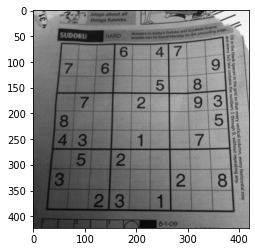

In [ ]:
sudoku_original = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(sudoku_original, cmap='gray')

## Simple thresholding

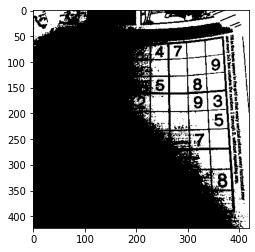

In [ ]:
_, th1 = cv2.threshold(sudoku_original, 127, 255, cv2.THRESH_BINARY)
plt.imshow(th1, cmap='gray')

## Adaptive thresholding

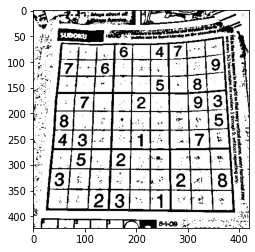

In [ ]:
th2 = cv2.adaptiveThreshold(sudoku_original, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, 3)
plt.imshow(th2, cmap='gray')

## Otsu thresholding (or Otsu's Binarization)

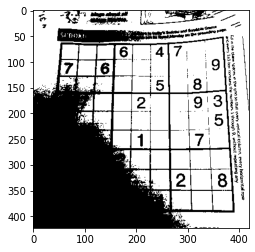

In [ ]:
_, th3 = cv2.threshold(sudoku_original, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th3, cmap='gray')